In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
print("\n" + "="*80)
print("STEP 1: LOADING DATASET")
print("="*80)

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target
df['diagnosis_label'] = df['diagnosis'].map({0: 'malignant', 1: 'benign'})

print(f"\nDataset Shape: {df.shape}")
print(f"Number of Features: {len(data.feature_names)}")
print(f"Number of Samples: {len(df)}")

print("\n📋 Available feature names:")
for i, name in enumerate(data.feature_names, 1):
    print(f"   {i}. {name}")

print(f"\nTarget Distribution:")
print(df['diagnosis_label'].value_counts())


STEP 1: LOADING DATASET

Dataset Shape: (569, 32)
Number of Features: 30
Number of Samples: 569

📋 Available feature names:
   1. mean radius
   2. mean texture
   3. mean perimeter
   4. mean area
   5. mean smoothness
   6. mean compactness
   7. mean concavity
   8. mean concave points
   9. mean symmetry
   10. mean fractal dimension
   11. radius error
   12. texture error
   13. perimeter error
   14. area error
   15. smoothness error
   16. compactness error
   17. concavity error
   18. concave points error
   19. symmetry error
   20. fractal dimension error
   21. worst radius
   22. worst texture
   23. worst perimeter
   24. worst area
   25. worst smoothness
   26. worst compactness
   27. worst concavity
   28. worst concave points
   29. worst symmetry
   30. worst fractal dimension

Target Distribution:
diagnosis_label
benign       357
malignant    212
Name: count, dtype: int64


In [4]:
# ============================================================================
# CELL 3: Feature Selection (PROJECT REQUIREMENT: 5 FEATURES)
# ============================================================================
print("\n" + "="*80)
print("STEP 2: FEATURE SELECTION")
print("="*80)

# IMPORTANT: Use the EXACT column names from the dataset
# The actual column names have spaces: 'mean radius' not 'radius_mean'
SELECTED_FEATURES = [
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean area',
    'mean concavity'
]

print(f"\n✅ Selected {len(SELECTED_FEATURES)} features:")
for i, feature in enumerate(SELECTED_FEATURES, 1):
    print(f"   {i}. {feature}")

# Verify features exist in dataframe
print("\n🔍 Verifying features exist in dataset...")
for feature in SELECTED_FEATURES:
    if feature in df.columns:
        print(f"   ✅ '{feature}' - FOUND")
    else:
        print(f"   ❌ '{feature}' - NOT FOUND")
        print(f"      Available columns: {df.columns.tolist()}")
        break

# Extract only selected features
X = df[SELECTED_FEATURES].values
y = df['diagnosis'].values

print(f"\n✅ Features extracted successfully!")
print(f"   Features shape: {X.shape}")
print(f"   Target shape: {y.shape}")



STEP 2: FEATURE SELECTION

✅ Selected 5 features:
   1. mean radius
   2. mean texture
   3. mean perimeter
   4. mean area
   5. mean concavity

🔍 Verifying features exist in dataset...
   ✅ 'mean radius' - FOUND
   ✅ 'mean texture' - FOUND
   ✅ 'mean perimeter' - FOUND
   ✅ 'mean area' - FOUND
   ✅ 'mean concavity' - FOUND

✅ Features extracted successfully!
   Features shape: (569, 5)
   Target shape: (569,)


In [5]:

# ============================================================================
# CELL 4: Data Preprocessing
# ============================================================================
print("\n" + "="*80)
print("STEP 3: DATA PREPROCESSING")
print("="*80)

# Check for missing values
print("\n3.1 Checking for missing values...")
missing_values = df[SELECTED_FEATURES].isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
if missing_values.sum() == 0:
    print("✅ No missing values found!")

# Statistical summary for selected features
print("\n3.2 Statistical Summary (Selected Features):")
print(df[SELECTED_FEATURES].describe())


STEP 3: DATA PREPROCESSING

3.1 Checking for missing values...
Total missing values: 0
✅ No missing values found!

3.2 Statistical Summary (Selected Features):
       mean radius  mean texture  mean perimeter    mean area  mean concavity
count   569.000000    569.000000      569.000000   569.000000      569.000000
mean     14.127292     19.289649       91.969033   654.889104        0.088799
std       3.524049      4.301036       24.298981   351.914129        0.079720
min       6.981000      9.710000       43.790000   143.500000        0.000000
25%      11.700000     16.170000       75.170000   420.300000        0.029560
50%      13.370000     18.840000       86.240000   551.100000        0.061540
75%      15.780000     21.800000      104.100000   782.700000        0.130700
max      28.110000     39.280000      188.500000  2501.000000        0.426800


In [6]:

# ============================================================================
# CELL 5: Train-Test Split
# ============================================================================
print("\n" + "="*80)
print("STEP 4: TRAIN-TEST SPLIT")
print("="*80)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]} features")


STEP 4: TRAIN-TEST SPLIT
Training set size: 455 samples
Testing set size: 114 samples
Feature dimensions: 5 features


In [7]:

# ============================================================================
# CELL 6: Feature Scaling
# ============================================================================
print("\n" + "="*80)
print("STEP 5: FEATURE SCALING")
print("="*80)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed using StandardScaler")
print(f"   Mean of scaled training data: {X_train_scaled.mean():.6f}")
print(f"   Std of scaled training data: {X_train_scaled.std():.6f}")



STEP 5: FEATURE SCALING
✅ Feature scaling completed using StandardScaler
   Mean of scaled training data: -0.000000
   Std of scaled training data: 1.000000


In [8]:
# ============================================================================
# CELL 7: Model Training
# ============================================================================
print("\n" + "="*80)
print("STEP 6: MODEL TRAINING")
print("="*80)

# Initialize Logistic Regression model
model = LogisticRegression(
    max_iter=10000,
    random_state=42,
    solver='lbfgs'
)

print("Training Logistic Regression model...")
model.fit(X_train_scaled, y_train)
print("✅ Model training completed!")


STEP 6: MODEL TRAINING
Training Logistic Regression model...
✅ Model training completed!



STEP 7: MODEL EVALUATION

📊 CLASSIFICATION METRICS:
   Accuracy:  0.9211 (92.11%)
   Precision: 0.9437
   Recall:    0.9306
   F1-Score:  0.9371

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   malignant       0.88      0.90      0.89        42
      benign       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



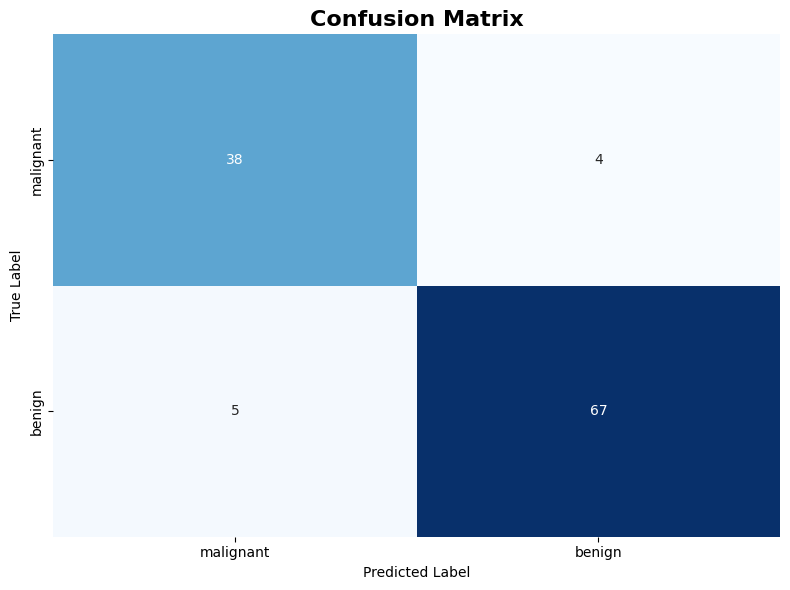

✅ Saved: confusion_matrix.png


In [9]:

# ============================================================================
# CELL 8: Model Evaluation
# ============================================================================
print("\n" + "="*80)
print("STEP 7: MODEL EVALUATION")
print("="*80)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 CLASSIFICATION METRICS:")
print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   Precision: {precision:.4f}")
print(f"   Recall:    {recall:.4f}")
print(f"   F1-Score:  {f1:.4f}")

print("\n📋 CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: confusion_matrix.png")

In [10]:

# ============================================================================
# CELL 9: Save Model
# ============================================================================
print("\n" + "="*80)
print("STEP 8: MODEL PERSISTENCE")
print("="*80)

# Save the trained model
with open('breast_cancer_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✅ Model saved: breast_cancer_model.pkl")

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved: scaler.pkl")

# Save metadata with user-friendly feature names for the web app
# Convert 'mean radius' to 'radius_mean' for consistency with web app
feature_names_for_app = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'concavity_mean'
]

metadata = {
    'model_type': 'Logistic Regression',
    'feature_names': feature_names_for_app,  # Use web-friendly names
    'actual_feature_names': SELECTED_FEATURES,  # Store actual names used
    'num_features': len(SELECTED_FEATURES),
    'target_names': data.target_names.tolist(),
    'accuracy': float(accuracy),
    'precision': float(precision),
    'recall': float(recall),
    'f1_score': float(f1),
    'training_samples': int(X_train.shape[0]),
    'test_samples': int(X_test.shape[0])
}

with open('model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)
print("✅ Metadata saved: model_metadata.json")

print("\n📄 Metadata content:")
print(json.dumps(metadata, indent=2))



STEP 8: MODEL PERSISTENCE
✅ Model saved: breast_cancer_model.pkl
✅ Scaler saved: scaler.pkl
✅ Metadata saved: model_metadata.json

📄 Metadata content:
{
  "model_type": "Logistic Regression",
  "feature_names": [
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "concavity_mean"
  ],
  "actual_feature_names": [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
    "mean concavity"
  ],
  "num_features": 5,
  "target_names": [
    "malignant",
    "benign"
  ],
  "accuracy": 0.9210526315789473,
  "precision": 0.9436619718309859,
  "recall": 0.9305555555555556,
  "f1_score": 0.9370629370629371,
  "training_samples": 455,
  "test_samples": 114
}


In [11]:
# ============================================================================
# CELL 10: Demonstrate Model Reloading
# ============================================================================
print("\n" + "="*80)
print("STEP 9: DEMONSTRATE MODEL RELOADING")
print("="*80)

# Load the saved model
with open('breast_cancer_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
print("✅ Model loaded successfully from disk!")

# Load the saved scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)
print("✅ Scaler loaded successfully from disk!")

# Load metadata
with open('model_metadata.json', 'r') as f:
    loaded_metadata = json.load(f)
print("✅ Metadata loaded successfully from disk!")

# Test prediction with loaded model
test_sample = X_test[0].reshape(1, -1)
test_sample_scaled = loaded_scaler.transform(test_sample)
prediction = loaded_model.predict(test_sample_scaled)
prediction_proba = loaded_model.predict_proba(test_sample_scaled)

print("\n🔬 SAMPLE PREDICTION (using reloaded model):")
print(f"   Input features: {SELECTED_FEATURES}")
print(f"   Input values: {test_sample[0]}")
print(f"   Actual label: {data.target_names[y_test[0]]}")
print(f"   Predicted label: {data.target_names[prediction[0]]}")
print(f"   Probabilities: Malignant={prediction_proba[0][0]:.4f}, Benign={prediction_proba[0][1]:.4f}")
print(f"   Confidence: {prediction_proba[0][prediction[0]]*100:.2f}%")
print(f"   Match: {'✅ Correct' if y_test[0] == prediction[0] else '❌ Incorrect'}")

# Test with manual input
print("\n🧪 MANUAL TEST PREDICTION:")
# Sample benign tumor values
manual_input = np.array([[13.5, 18.2, 87.5, 566.0, 0.08]]).reshape(1, -1)
manual_scaled = loaded_scaler.transform(manual_input)
manual_pred = loaded_model.predict(manual_scaled)
manual_proba = loaded_model.predict_proba(manual_scaled)

print(f"   Test input: {manual_input[0]}")
print(f"   Predicted: {data.target_names[manual_pred[0]]}")
print(f"   Confidence: {manual_proba[0][manual_pred[0]]*100:.2f}%")



STEP 9: DEMONSTRATE MODEL RELOADING
✅ Model loaded successfully from disk!
✅ Scaler loaded successfully from disk!
✅ Metadata loaded successfully from disk!

🔬 SAMPLE PREDICTION (using reloaded model):
   Input features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity']
   Input values: [1.955e+01 2.877e+01 1.336e+02 1.207e+03 1.784e-01]
   Actual label: malignant
   Predicted label: malignant
   Probabilities: Malignant=0.9999, Benign=0.0001
   Confidence: 99.99%
   Match: ✅ Correct

🧪 MANUAL TEST PREDICTION:
   Test input: [1.35e+01 1.82e+01 8.75e+01 5.66e+02 8.00e-02]
   Predicted: benign
   Confidence: 83.14%


In [12]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("PROJECT SUMMARY")
print("="*80)

print("\n✅ COMPLETED TASKS:")
print("   1. ✅ Loaded Wisconsin Breast Cancer dataset")
print("   2. ✅ Selected 5 features (as per requirement)")
print("   3. ✅ Performed data preprocessing")
print("   4. ✅ Applied feature scaling (StandardScaler)")
print("   5. ✅ Trained Logistic Regression model")
print("   6. ✅ Evaluated model performance")
print("   7. ✅ Saved model to disk (pickle)")
print("   8. ✅ Demonstrated model reloading")
print("   9. ✅ Tested predictions")

print(f"\n📊 FINAL PERFORMANCE (with {len(SELECTED_FEATURES)} features):")
print(f"   Accuracy:  {accuracy*100:.2f}%")
print(f"   Precision: {precision:.4f}")
print(f"   Recall:    {recall:.4f}")
print(f"   F1-Score:  {f1:.4f}")

print("\n📁 FILES TO DOWNLOAD FOR WEB APP:")
print("   1. breast_cancer_model.pkl    - Trained model")
print("   2. scaler.pkl                 - Feature scaler")
print("   3. model_metadata.json        - Model information")

print("\n⚠️  IMPORTANT DOWNLOAD INSTRUCTIONS:")
print("   1. Click the folder icon on the left sidebar")
print("   2. Right-click each file and select 'Download'")
print("   3. Place all 3 files in your project's 'model/' folder")

print("\n✅ Ready for deployment!")
print("="*80)


PROJECT SUMMARY

✅ COMPLETED TASKS:
   1. ✅ Loaded Wisconsin Breast Cancer dataset
   2. ✅ Selected 5 features (as per requirement)
   3. ✅ Performed data preprocessing
   4. ✅ Applied feature scaling (StandardScaler)
   5. ✅ Trained Logistic Regression model
   6. ✅ Evaluated model performance
   7. ✅ Saved model to disk (pickle)
   8. ✅ Demonstrated model reloading
   9. ✅ Tested predictions

📊 FINAL PERFORMANCE (with 5 features):
   Accuracy:  92.11%
   Precision: 0.9437
   Recall:    0.9306
   F1-Score:  0.9371

📁 FILES TO DOWNLOAD FOR WEB APP:
   1. breast_cancer_model.pkl    - Trained model
   2. scaler.pkl                 - Feature scaler
   3. model_metadata.json        - Model information

⚠️  IMPORTANT DOWNLOAD INSTRUCTIONS:
   1. Click the folder icon on the left sidebar
   2. Right-click each file and select 'Download'
   3. Place all 3 files in your project's 'model/' folder

✅ Ready for deployment!
